# Trabajo Practico 5 Segmentación
Alumnos:  
ARRIETA Nahuel  
MOYANO Lucas

## 3. (*) Umbralización híbrida (combinación de Otsu + morfología). ¿Cómo mejorar la segmentación de objetos con ruido o regiones conectadas? Práctica sugerida: Aplicar Otsu, luego refinar con cv2.morphologyEx() (apertura o cierre).

In [1]:
import cv2
import sklearn
import skimage
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi

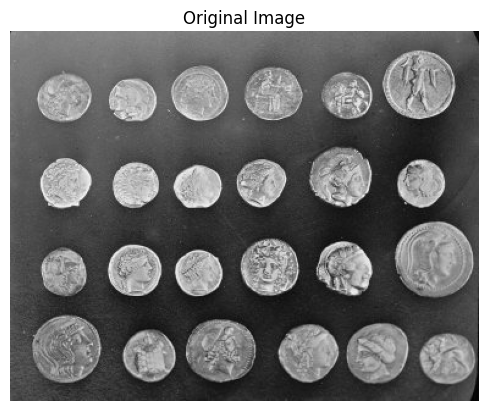

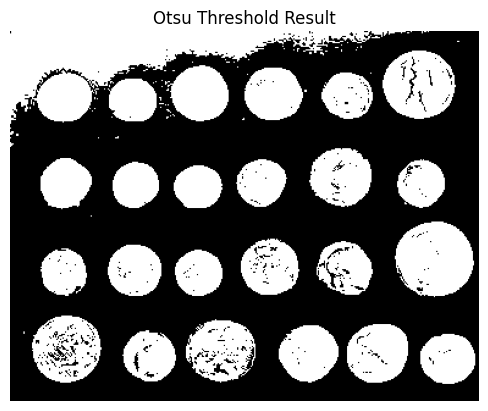

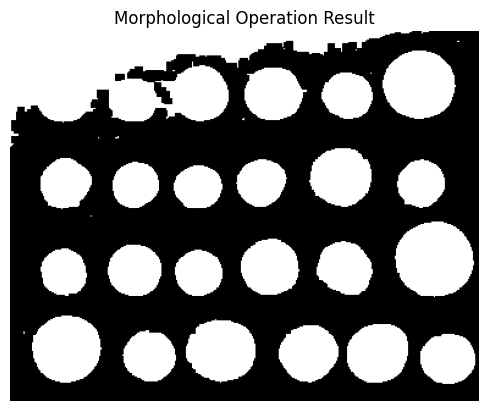

In [ ]:
image = skimage.data.coins()
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

threshold = skimage.filters.threshold_otsu(image)
binary = image > threshold  # binary is a 2D boolean array

# Display
plt.imshow(binary, cmap='gray')  # 'gray' colormap for binary images
plt.title("Otsu Threshold Result")
plt.axis('off')
plt.show()

# Define kernel
kernel = np.ones((5, 5), np.uint8)

morphed = cv2.morphologyEx((binary * 255).astype(np.uint8), cv2.MORPH_CLOSE, kernel)
# Display the result of morphological operation
plt.imshow(morphed, cmap='gray')
plt.title("Morphological Operation (close) Result")
plt.axis('off')
plt.show()

## 4. (*) Segmentación por detección de bordes. ¿Cómo se puede usar la información de bordes para segmentar una imagen? Práctica sugerida: Detectar bordes con cv2.Canny() o skimage.filters.sobel, luego aplicar umbral y cerrar regiones con morfología.

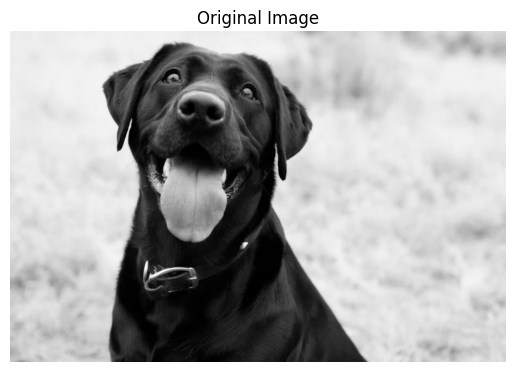

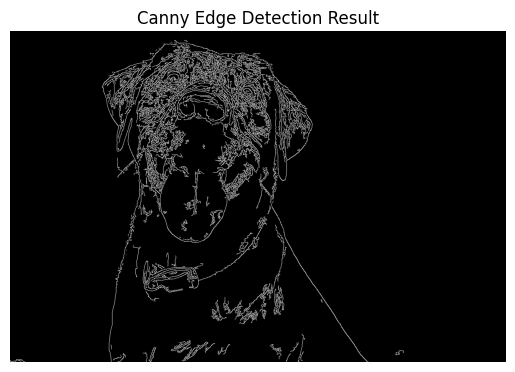

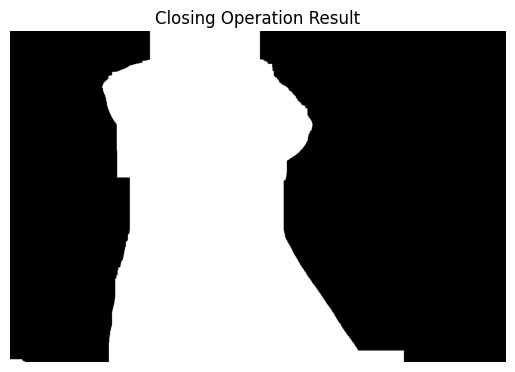

In [38]:
grey_dog = cv2.imread('img/blackDog2.png', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(grey_dog, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

canny_dog = cv2.Canny(grey_dog, 10, 100)
# Display the Canny edge detection result
plt.imshow(canny_dog, cmap='gray')
plt.title("Canny Edge Detection Result")
plt.axis('off')
plt.show()


# Apply morphological operations
kernel_dog = np.ones((125, 125), np.uint8)
morphed_dog = cv2.morphologyEx(canny_dog, cv2.MORPH_CLOSE, kernel_dog)
# Display the result of morphological operation
plt.imshow(morphed_dog, cmap='gray')
plt.title("Closing Operation Result")
plt.axis('off')
plt.show()


## 8. (*) Segmentación basada en regiones (crecimiento o split-merge). ¿Cómo se puede segmentar una imagen expandiendo regiones homogéneas? Práctica sugerida: Usar skimage.segmentation.flood() o flood fill() para realizar crecimiento de regiones desde semillas.

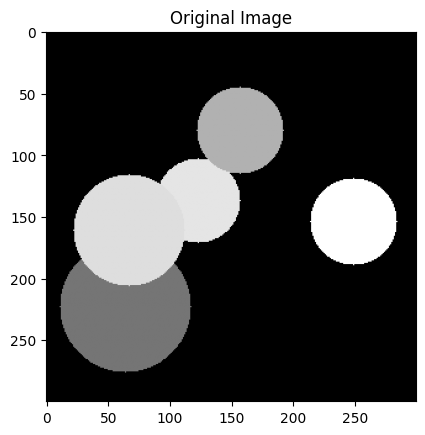

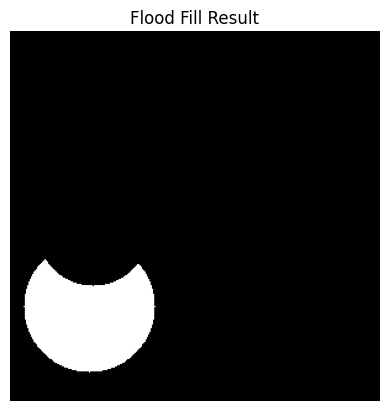

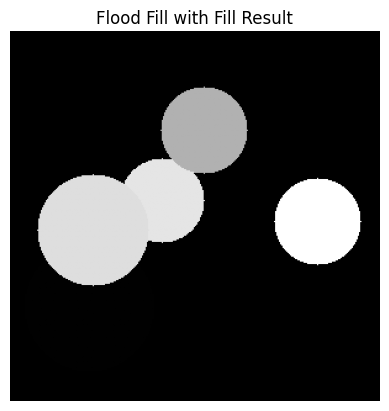

In [40]:
# we load img with skimage
image = skimage.io.imread('img/img_grises2.png', as_gray=True)
# Show it
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.show()

seed = (250, 50)  # Initial seed point

flooded = skimage.segmentation.flood(image, seed, tolerance=0.5)
# Display the result of flood fill
plt.imshow(flooded, cmap='gray')
plt.title("Flood Fill Result")
plt.axis('off')
plt.show()

flooded_filled = skimage.segmentation.flood_fill(image, seed, 1, tolerance=0.5)
# Display the result of flood fill with fill
plt.imshow(flooded_filled, cmap='gray')
plt.title("Flood Fill with Fill Result")
plt.axis('off')
plt.show()


## 10. (*) Segmentación por combinación de técnicas (pipeline) Pregunta: ¿Qué beneficios tiene combinar varias técnicas de segmentación en un mismo flujo de procesamiento? Práctica sugerida: Aplicar primero Canny + morfología para generar una máscara, luego segmentar con Watershed o K-means sobre la región recortada.

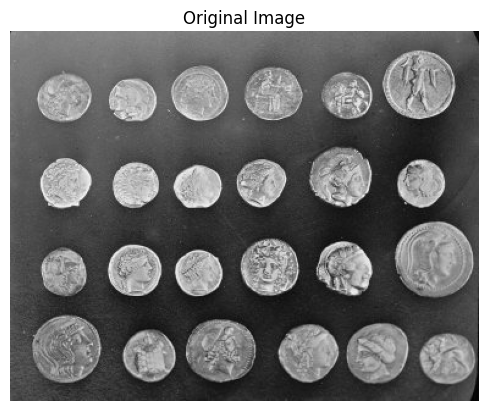

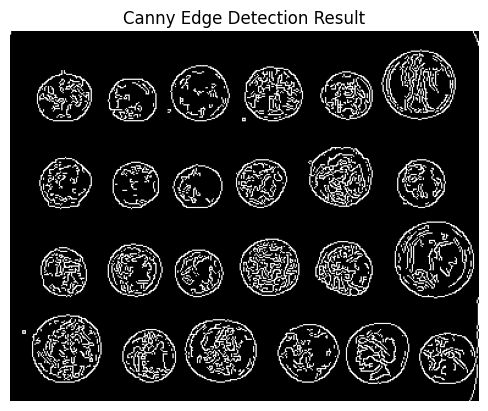

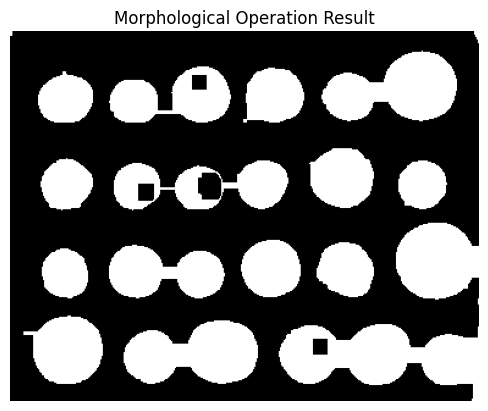

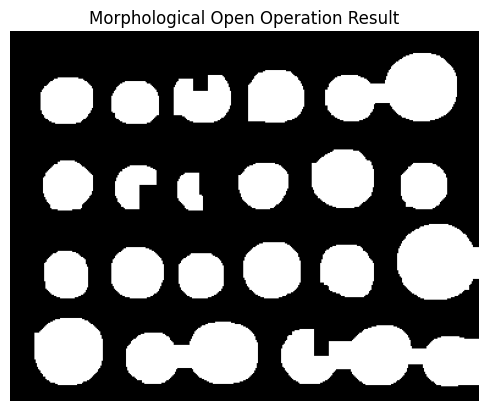

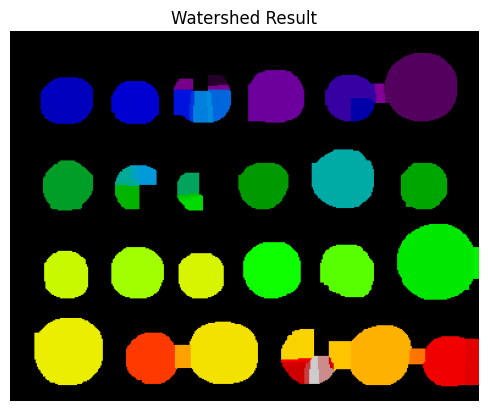

In [ ]:
image = skimage.data.coins()

# Show it
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# apply canny
canny = cv2.Canny(image, 100, 200)
# Display the Canny edge detection result
plt.imshow(canny, cmap='gray')
plt.title("Canny Edge Detection Result")
plt.axis('off')
plt.show()

# apply morphology
kernel = np.ones((12, 12), np.uint8)
morphed = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)
# Display the result of morphological operation
plt.imshow(morphed, cmap='gray')
plt.title("Morphological Operation Result")
plt.axis('off')
plt.show()

# apply open operation
morphed_open = cv2.morphologyEx(morphed, cv2.MORPH_OPEN, kernel)
# Display the result of morphological open operation
plt.imshow(morphed_open, cmap='gray')
plt.title("Morphological Open Operation Result")
plt.axis('off')
plt.show()

# apply watershed
distance = ndi.distance_transform_edt(morphed_open)
# Get coordinates of local maxima
coordinates = skimage.feature.peak_local_max(distance, labels=morphed_open)
# Create a mask of local maxima
local_max = np.zeros_like(distance, dtype=bool)
local_max[tuple(coordinates.T)] = True
markers = ndi.label(local_max)[0]
labels = skimage.segmentation.watershed(-distance, markers, mask=morphed_open)
# Display the result of watershed
plt.imshow(labels, cmap='nipy_spectral')
plt.title("Watershed Result")
plt.axis('off')
plt.show()


### 11. (*) Elegir y describir alguno de las siguientes tecnicas de segmentación:
a) **Basada en clustering**  
b) Basada en Grafos  
c) Basadas en Modelos Probabilísticos y Estadísticas  

a) La segmentación basada en clustering trata los píxeles como datos sin etiquetar y los agrupa según sus características (por ejemplo color, intensidad o textura). Así, cada grupo o clúster de píxeles define un segmento de imagen. Este enfoque no supervisado resulta útil cuando no se dispone de etiquetas previas, y puede detectar regiones complejas basándose en similitud estadística de los píxeles. A diferencia de métodos simples como el umbralado o la detección de bordes, el clustering permite segmentar imágenes en múltiples regiones con formas arbitrarias y distribuir cada píxel en un segmento.